In [154]:
import numpy as np
import chaosGen as cg
import scipy.optimize as sco
import matplotlib.pyplot as plt

from importlib import reload
cg = reload(cg)
ChaosGenerator = cg.ChaosGenerator

In [13]:
class InverseLE (ChaosGenerator) :
    pass

In [155]:
def invmap (le, eps=1e-4) :
    if le <= np.log(2) :
        # print ("n = 2")
        lep = lambda p : le + p*np.log(p) + (1-p)*np.log(1-p)
        lo, mid, hi = 0, 0.5, 1
        cmap = lambda p : lambda x : x/p if x <= p else (1-x)/(1-p)
    else :
        n = np.ceil(np.exp(le)).astype(np.int)
        # print ("n = {}".format(n))
        lep = lambda p : le - (n-2)/n*np.log(n) + p*np.log(p) + (2/n - p)*np.log(2/n - p)
        lo, mid, hi = 0, 1/n, 2/n
        
        def cmap (p) :
            def _cmap (x) :
                nx = n*x
                nums = np.arange(0, n-2)
                sub = nums[np.argmin(np.where(nx - nums > 0, nx - nums, n))]
                
                if sub < n-3 or nx < n-2 :
                    return nx - sub
                elif nx < n-2 + p*n : # sub == n-3
                    return (nx - (sub+1))/(n*p)
                else :
                    return (nx - (sub+1) - n*p)/(2 - n*p)
                    
            return _cmap
        
    p1 = sco.brentq (lep, lo+eps, mid-eps)
    p2 = sco.brentq (lep, mid+eps, hi-eps)
    return [p1, p2], cmap

In [158]:
# le=1.28991999999 --> n=4, p=0.1

plist, cmapp = invmap(1.28991999999)
print (plist)
cmap = np.vectorize(cmapp(plist[0]))

[0.09999856985191316, 0.4000014301480868]


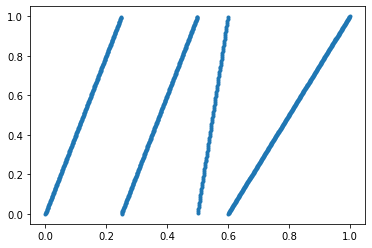

In [174]:
cmapVec = np.vectorize(cmap)
plt.plot (lin, cmapVec(lin), 'o', markersize=3)
pass